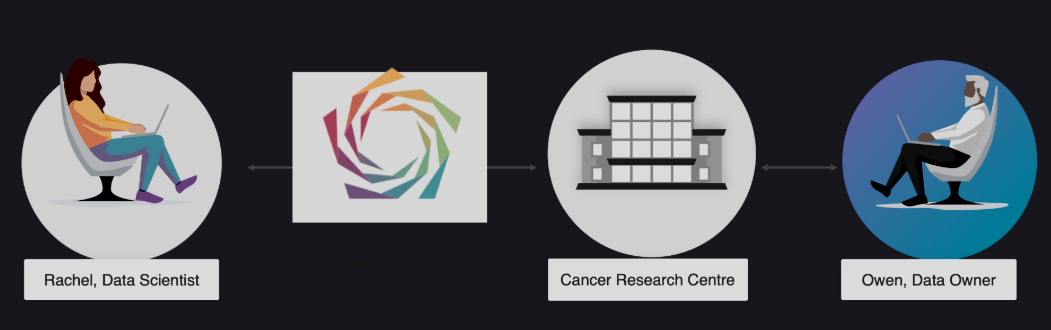

# **Brief setup**

**Rachel** is a **Data Scientist**, and researcher who is working on a project using Machine Learning to study breast cancer data. To do so, Rachel would like to use the (non-public) “Breast Cancer Biormaker” dataset that has been made available on the Cancer Research Centre Datasite.

**Owen** is a **laboratory data manager** in the Cancer Biomarker Research group. Owen is responsibile to organise, and curate the database of clinical data collected from anonymised patient samples. Due to legal and regulatory constraints, this dataset cannot be made publicly available, nor any of its copy can leave the premises of their research centre. Nonetheless Owen is very keen on allowing researchers to feature the “Breast Cancer Biomarker” dataset in their projects. So Owen sets up a **PySyft Datasite** hosting the dataset. As Data Owner, Owen will be responsible to:

- upload the data;

- manage credentials and user profiles;

- review any project proposal submitted by external data scientists.

In [1]:
import syft as sy

## Downloading our example dataset -> Breast Cancer. Idea is to simulate a version of the Owen’s “Breast Cancer Biomarker” dataset.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata 
metadata = breast_cancer_wisconsin_diagnostic.metadata
# variable information 
variables = breast_cancer_wisconsin_diagnostic.variables

### This dataset contains 596 samples, organised in 30 clinical features (i.e. X).

In [ ]:
X.head(n=5)  # n specifies how many rows we want in the preview

X.shape 

### How does PySyft allow to work with data **without downloading** nor seeing **any copy of the data** itself?

PySyft will solve this problem by hosting two **kinds of data**:

First, it will host the *real data*; second, it will host *mock data*, that is, a fake version of the real data that data scientists can download and see.

## 1. Create mock data

In [ ]:
#Before the dataset gets uploaded to the Datasite, Owen needs to create a mock version of their data by adding noise.

import numpy as np

#fix seed for reproducibility
SEED = 12345
np.random.seed(SEED)

X_mock = X.apply(lambda s: s + np.mean(s) + np.random.uniform(size=len(s)))
y_mock = y.sample(frac=1, random_state=SEED).reset_index(drop=True)